# Decision Tree

### Scenario

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.


In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# importing the classes where DT is implemented 
from sklearn.tree import DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR 

In [101]:
# importing Drugs dataset 
drugs = pd.read_csv('./drug200.csv')
drugs

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [102]:
# let's see some info about the data 
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [103]:
# Display Numeric Data
drugs.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [104]:
# Display Non-numeric Data (Object)
drugs.describe(include='O') 

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91


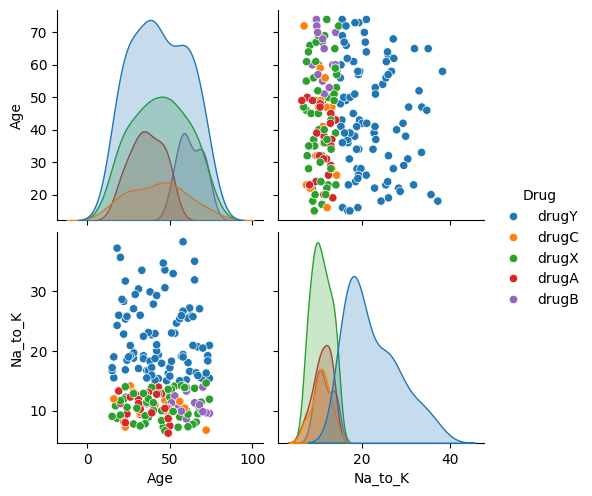

In [105]:
# Visualize numerical data
sns.pairplot(data=drugs, hue='Drug');

In [106]:
# Encode Object Type data into number (0, 1, ..)
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

cols = drugs.select_dtypes(include='O').columns
for col in cols:
    drugs[col] = label_enc.fit_transform(drugs[col])
    
# Data after encoding
# Sex               (Male - 1 | Female - 0)
# Blood Pressure    (High - 0 | Low - 1 | Normal - 2)
# Cholesterol       (High - 0 | Normal - 1)
# Drug              (drugA - 0 | drugB - 1 | drugC - 2 | drugX - 3 | drugY - 4)
drugs

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [107]:
# Divide the data into 2
# X : the features 
# y : the target (Drug Column)
X = drugs.drop(columns='Drug')
y = drugs['Drug']
# let's see our data X, y
display(X, y.head(20))

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


0     4
1     2
2     2
3     3
4     4
5     3
6     4
7     2
8     4
9     4
10    2
11    4
12    4
13    4
14    3
15    4
16    3
17    0
18    2
19    4
Name: Drug, dtype: int32

In [108]:
# Making the decision tree algorithm using library 
# now we need to split the data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)
# Building the model 
tree_clf0 = DTC(criterion='entropy'
                )
# Fitting the model
tree_clf0.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [109]:
from sklearn.metrics import classification_report
# third way using more than one metric 
y_pred = tree_clf0.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



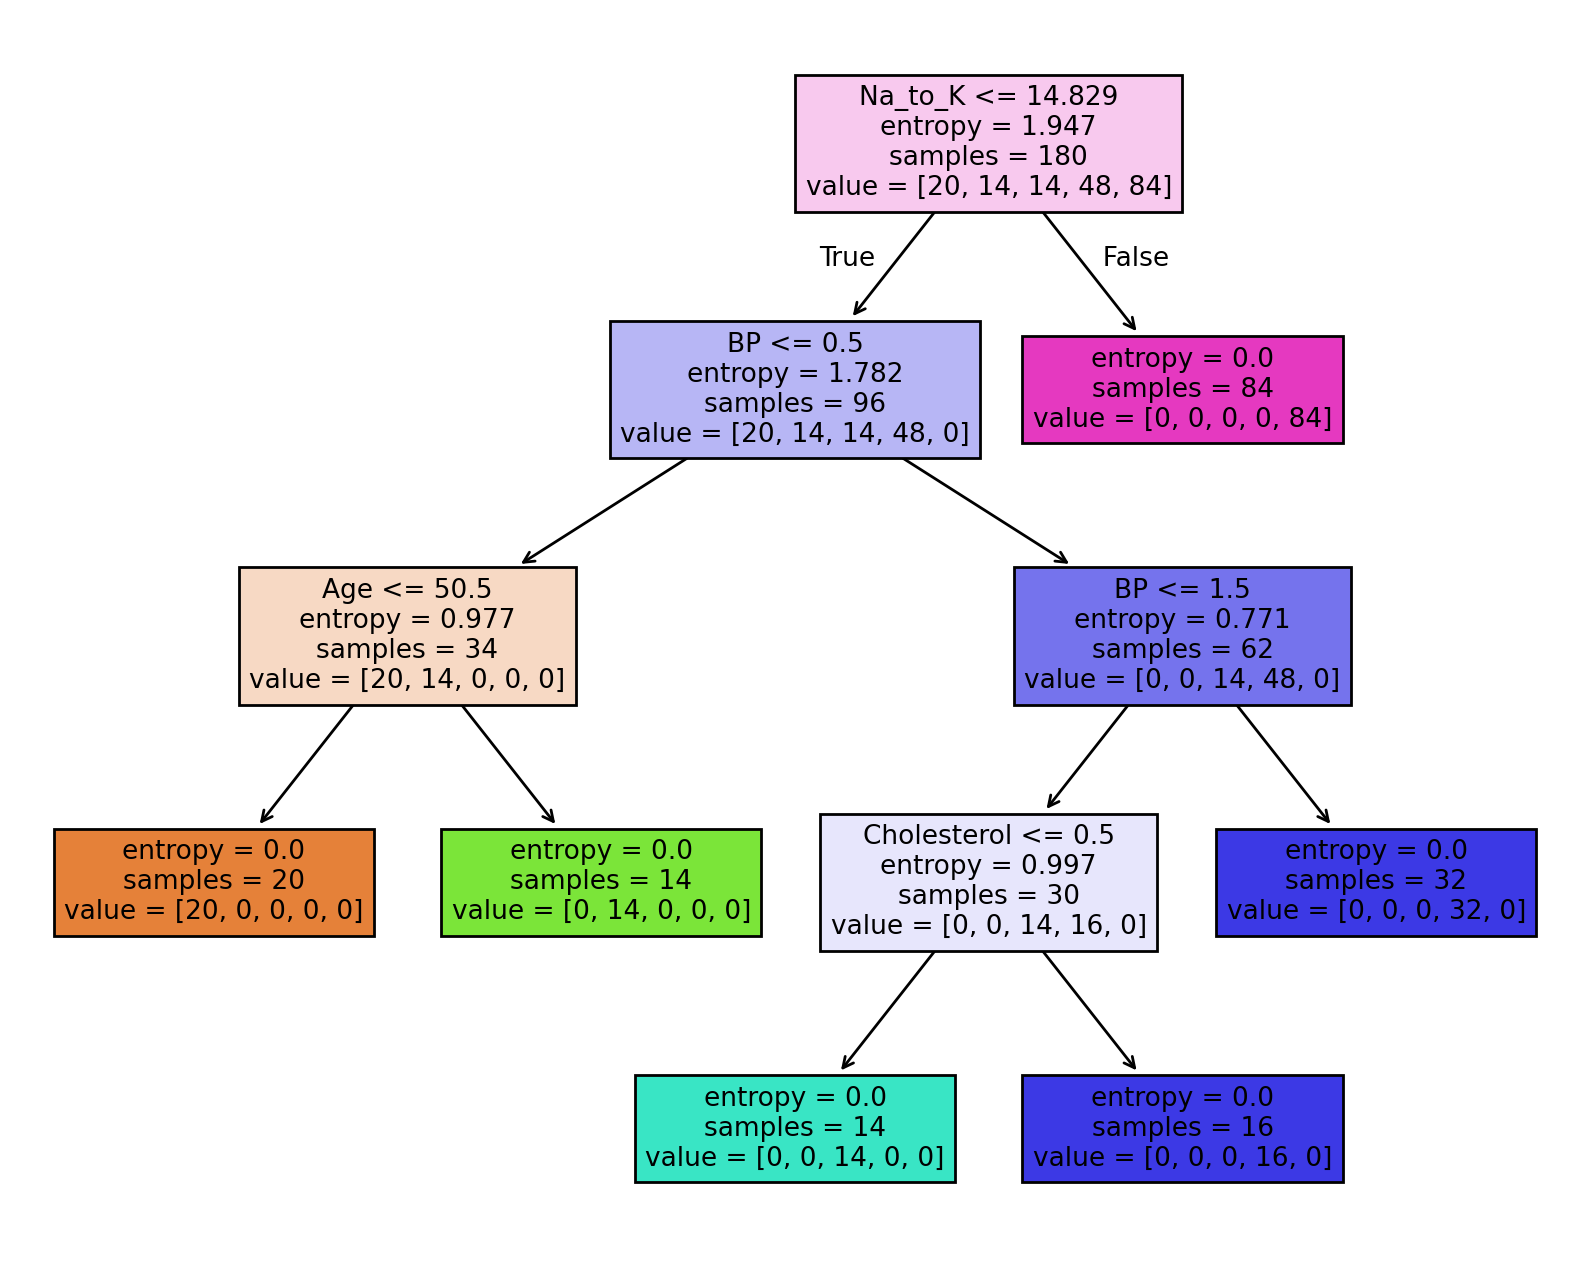

In [110]:
# visualsing👀 the Decision Tree🌳 
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 8), dpi=200)
plot_tree(tree_clf0, feature_names=drugs.columns, filled=True);
# Optinal parameters
# feature_names=drugs.columns, filled=True  
# filled=True  colors

In [111]:
feature_names = X_train.columns
feature_names

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')

Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Na_to_K        0.484223
BP             0.261700
Age            0.133257
Cholesterol    0.120820
Sex            0.000000
dtype: float64


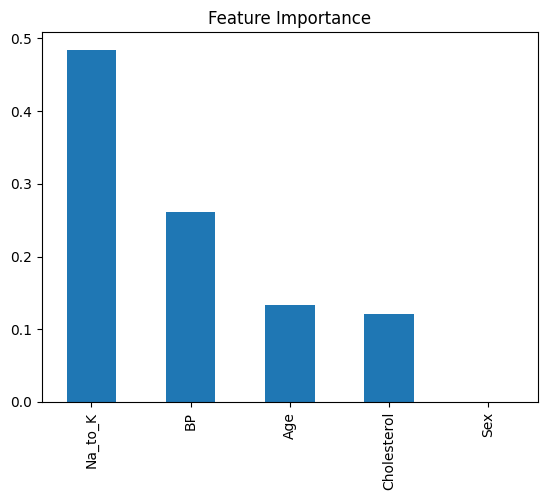

In [114]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DTC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_tree_clf = grid_search.best_estimator_
importances = best_tree_clf.feature_importances_
feature_importances = pd.Series(importances, index=feature_names)
feature_importances.sort_values(ascending=False, inplace=True)
print(feature_importances)

feature_importances.plot(kind='bar')
plt.title("Feature Importance")
plt.show()

In [113]:
name = input ("Enter your name: ")
age = int(input ("Enter your age: "))
sex = input ("Enter your gender (Male or Female): ")
bp = input ("Enter your blood pressure (High, Normal, or Low): ")
cholesterol = input ("Enter your cholesterol level (High or Normal): ")
na_to_k = input ("Enter your Na_to_K: ")

ValueError: invalid literal for int() with base 10: ''

In [ ]:
# Data after encoding
# Sex               (Male - 1 | Female - 0)
# Blood Pressure    (High - 0 | Low - 1 | Normal - 2)
# Cholesterol       (High - 0 | Normal - 1)
# Drug              (drugA - 0 | drugB - 1 | drugC - 2 | drugX - 3 | drugY - 4)
if sex.lower() == "male":
    sex = 1
elif sex.lower()  == "female":
    sex = 0
if bp.lower() == "high":
    bp = 0
elif bp.lower() == "low":
    bp = 1
elif bp.lower() == "normal":
    bp = 2
if cholesterol.lower() == "high":
    cholesterol = 0
elif cholesterol.lower()  == "normal":
    cholesterol = 1

In [ ]:
def predict_drug(sex, blood_pressure, cholesterol, na_to_k, age):
    input_data = pd.DataFrame({'Age': [age], 'Sex': [sex], 'BP': [blood_pressure], 'Cholesterol': [cholesterol], 'Na_to_K': [na_to_k]})
    predicted_drug = tree_clf0.predict(input_data)
    predicted_drug_name = label_enc.inverse_transform(predicted_drug)[0]
    return predicted_drug_name
print("Based on the data provided the most suitable drug for you is " + predict_drug(sex, bp, cholesterol, na_to_k, age))

Based on the data provided the most suitable drug for you is drugA


In [ ]:
print("Name: " + name)
print("Age: " + str(age))
print("Sex: " + str(sex))
print("BP: " + str(bp))
print("Cholesterol: " + str(cholesterol))
print("Na_to_K: " + str(na_to_k))

Name: r
Age: 1
Sex: 1
BP: 0
Cholesterol: 0
Na_to_K: 11
